In [1]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 132.5 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 50.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install mlflow --user


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 100.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 152.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [3]:
%pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
df=pd.read_csv('sampled_final_df.csv')
df_train=df.drop("isFraud",axis=1)
output_col=pd.DataFrame(df['isFraud'])

## Cleaning the dataset

In [3]:
df_train['CASH_IN']=df_train['CASH_IN'].map({True:1,False:0})
df_train['CASH_OUT']=df_train['CASH_OUT'].map({True:1,False:0})
df_train['DEBIT']=df_train['DEBIT'].map({True:1,False:0})
df_train['PAYMENT']=df_train['PAYMENT'].map({True:1,False:0})
df_train['TRANSFER']=df_train['TRANSFER'].map({True:1,False:0})


In [4]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,18417.240320,0.00,1.240395e+04,1.551259e+04,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,346354.615847,0.00,0.000000e+00,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,6049.000000,0.00,2.497772e+04,3.165680e+05,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,66777.824054,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,351115,1371643
4,379,678.130000,45082.000000,44403.87,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,717917.637444,0.00,1.174964e+07,1.246756e+07,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,792.000000,489.54,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,10303.000000,0.00,0.000000e+00,0.000000e+00,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,264334.474702,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,422565,1356128


In [5]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [6]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,18417.240320,0.00,1.240395e+04,1.551259e+04,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,346354.615847,0.00,0.000000e+00,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,6049.000000,0.00,2.497772e+04,3.165680e+05,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,66777.824054,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,351115,1371643
4,379,678.130000,45082.000000,44403.87,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,717917.637444,0.00,1.174964e+07,1.246756e+07,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,792.000000,489.54,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,10303.000000,0.00,0.000000e+00,0.000000e+00,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,264334.474702,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,422565,1356128


In [7]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [8]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04
mean,305.693384,2.129561e+05,5.368273e+05,4.270252e+05,1.019196e+06,1.191137e+06,0.000393,0.110213,0.552952,0.003443,0.167208,0.227882,5.139591e+05,3.150544e+06
std,173.018394,4.760683e+05,2.069521e+06,2.104247e+06,3.522850e+06,3.708267e+06,0.019833,0.313158,0.497193,0.058576,0.373165,0.419470,5.885310e+05,1.838557e+06
min,1.000000,9.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,2.600000e+01
25%,181.000000,2.783538e+04,1.048624e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769170e+05,1.555214e+06
50%,298.000000,1.057949e+05,6.282000e+04,0.000000e+00,3.767953e+04,2.428489e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.398270e+05,3.136695e+06
75%,404.000000,2.524101e+05,2.423399e+05,0.000000e+00,7.413421e+05,9.817932e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.056420e+05,4.752738e+06
max,742.000000,5.072328e+07,3.187613e+07,3.205108e+07,2.355353e+08,2.358797e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.721968e+06,6.352414e+06


In [9]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns


## Exploratory Data Analysis


### 1. First step is to see the type of columns so that we could conclude that even now some columns needs to be appropriated.


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50829 entries, 0 to 50828
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   step              50829 non-null  int64  
 1   amount            50829 non-null  float64
 2   oldbalanceOrg     50829 non-null  float64
 3   newbalanceOrig    50829 non-null  float64
 4   oldbalanceDest    50829 non-null  float64
 5   newbalanceDest    50829 non-null  float64
 6   isFlaggedFraud    50829 non-null  int64  
 7   CASH_IN           50829 non-null  int64  
 8   CASH_OUT          50829 non-null  int64  
 9   DEBIT             50829 non-null  int64  
 10  PAYMENT           50829 non-null  int64  
 11  TRANSFER          50829 non-null  int64  
 12  nameDest_encoded  50829 non-null  int64  
 13  nameOrig_encoded  50829 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.4 MB


### 2. NULL Values . First step is to see the Null Values


In [54]:
df_train.isnull().sum()

step                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFlaggedFraud      0
CASH_IN             0
CASH_OUT            0
DEBIT               0
PAYMENT             0
TRANSFER            0
nameDest_encoded    0
nameOrig_encoded    0
dtype: int64

<Axes: >

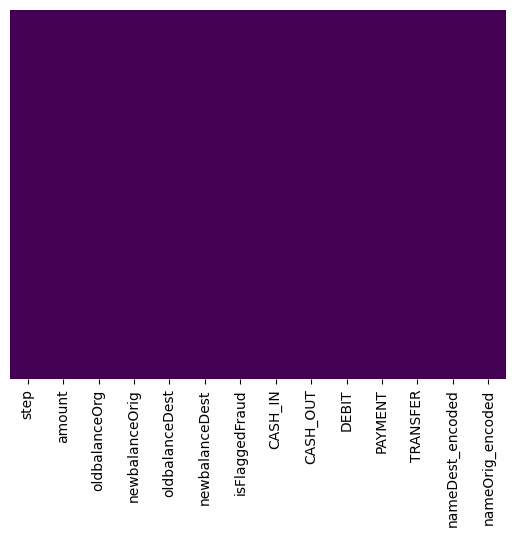

In [55]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### 3. Next step is to see the collinearity. We will use the spearman correlation since even if the dataset is spreaded we can see the correlation very easily. We will also use the Variable Inflation Factor to see the that whether a independent column could be predicted using other independednt columns

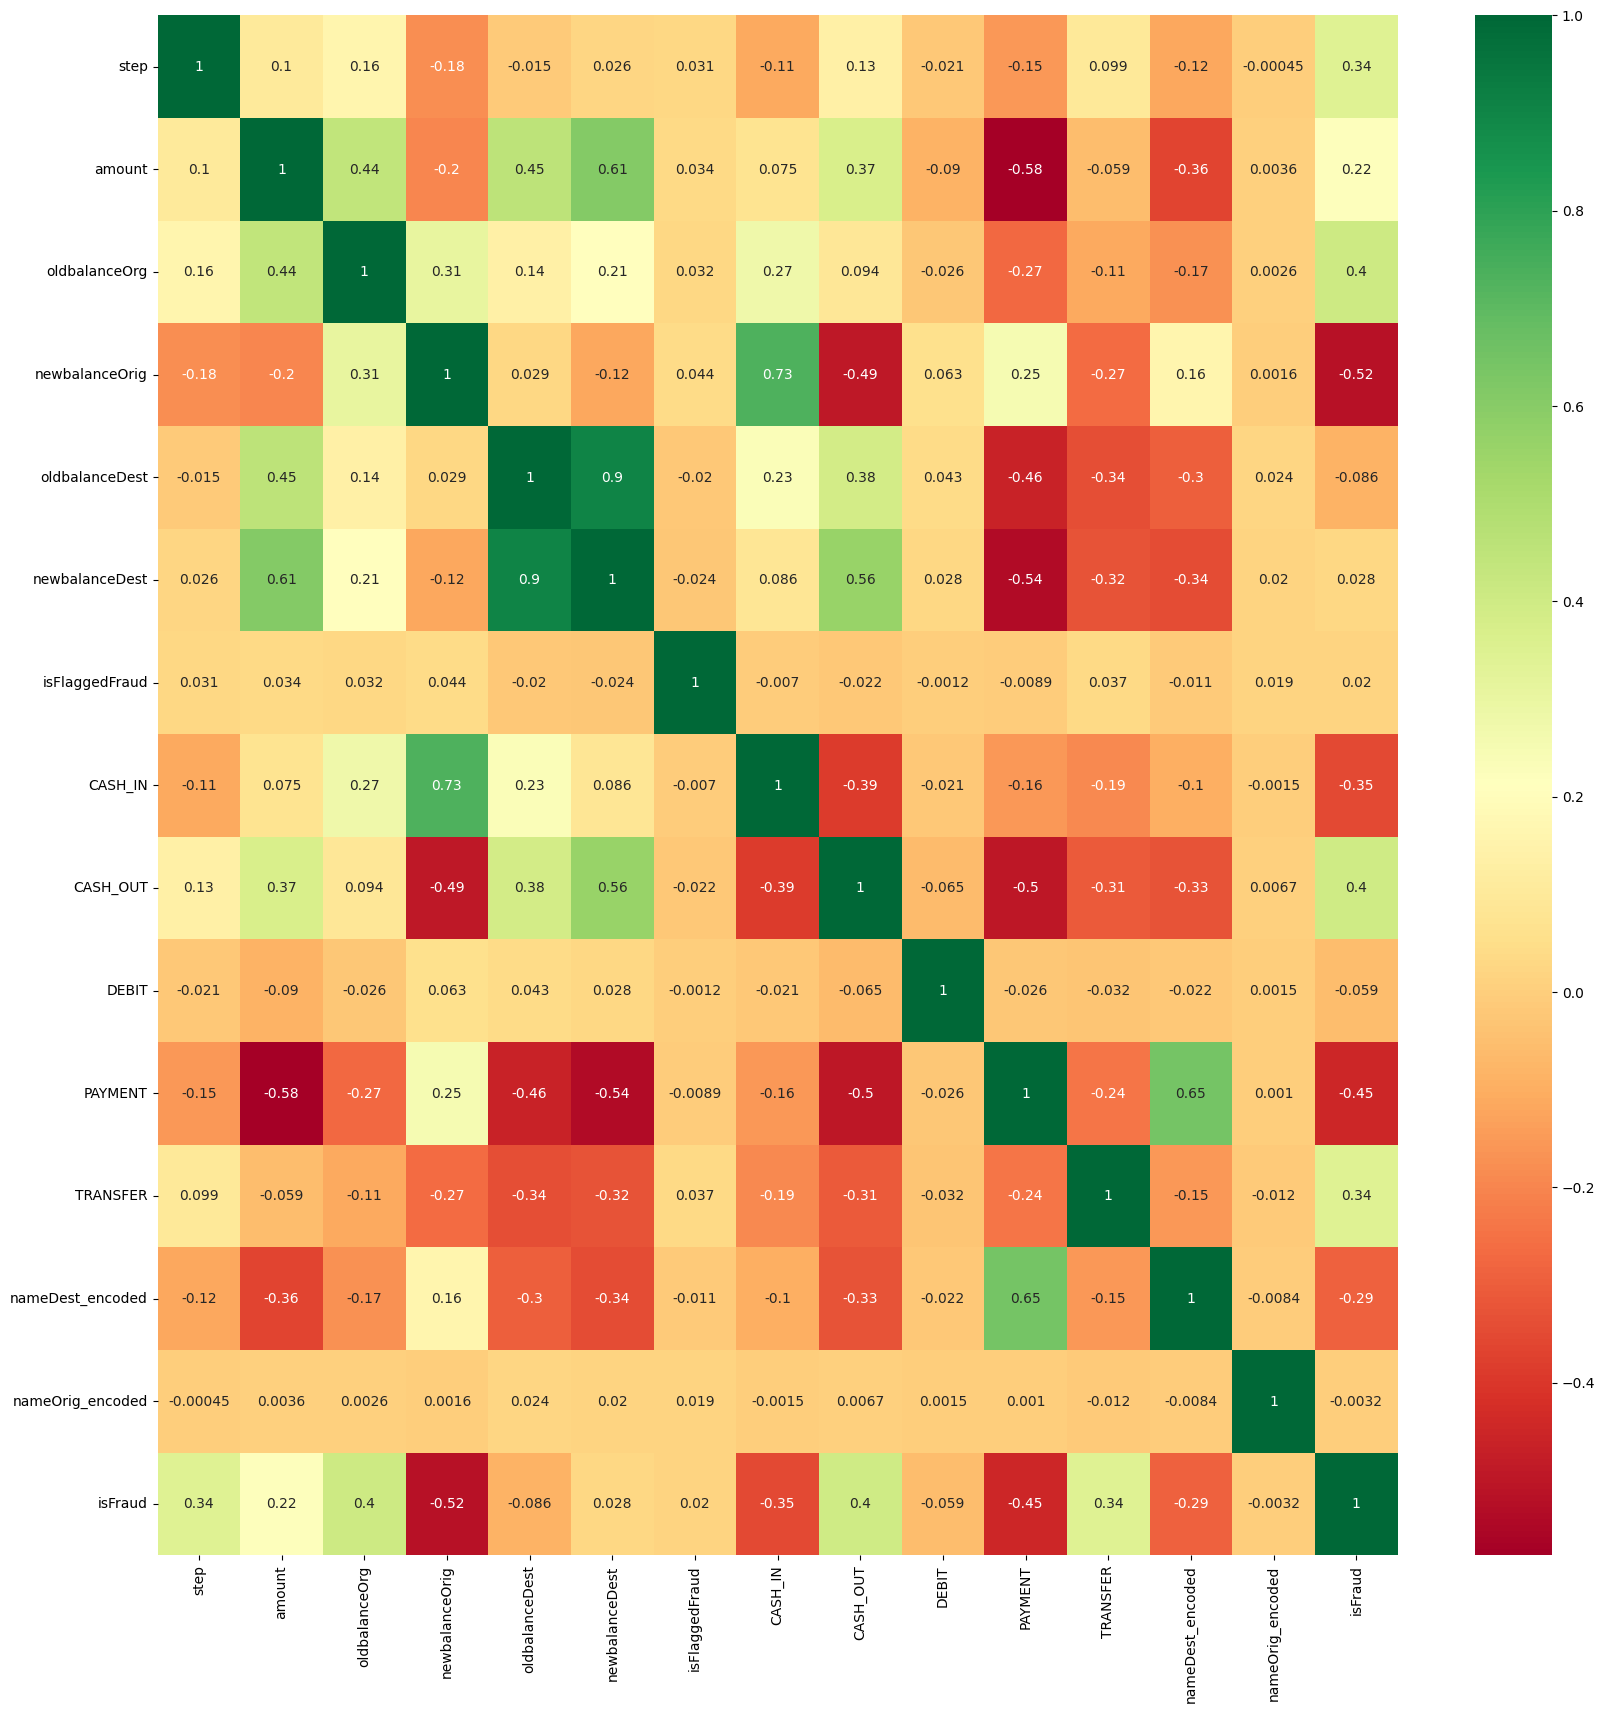

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [57]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
calc_vif(X)

,Variables,VIF
0,step,3.983052
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
6,isFlaggedFraud,1.076938
7,CASH_IN,2.283259
8,CASH_OUT,3.867847
9,DEBIT,1.016719


### 4. Next step is to see the outliers.


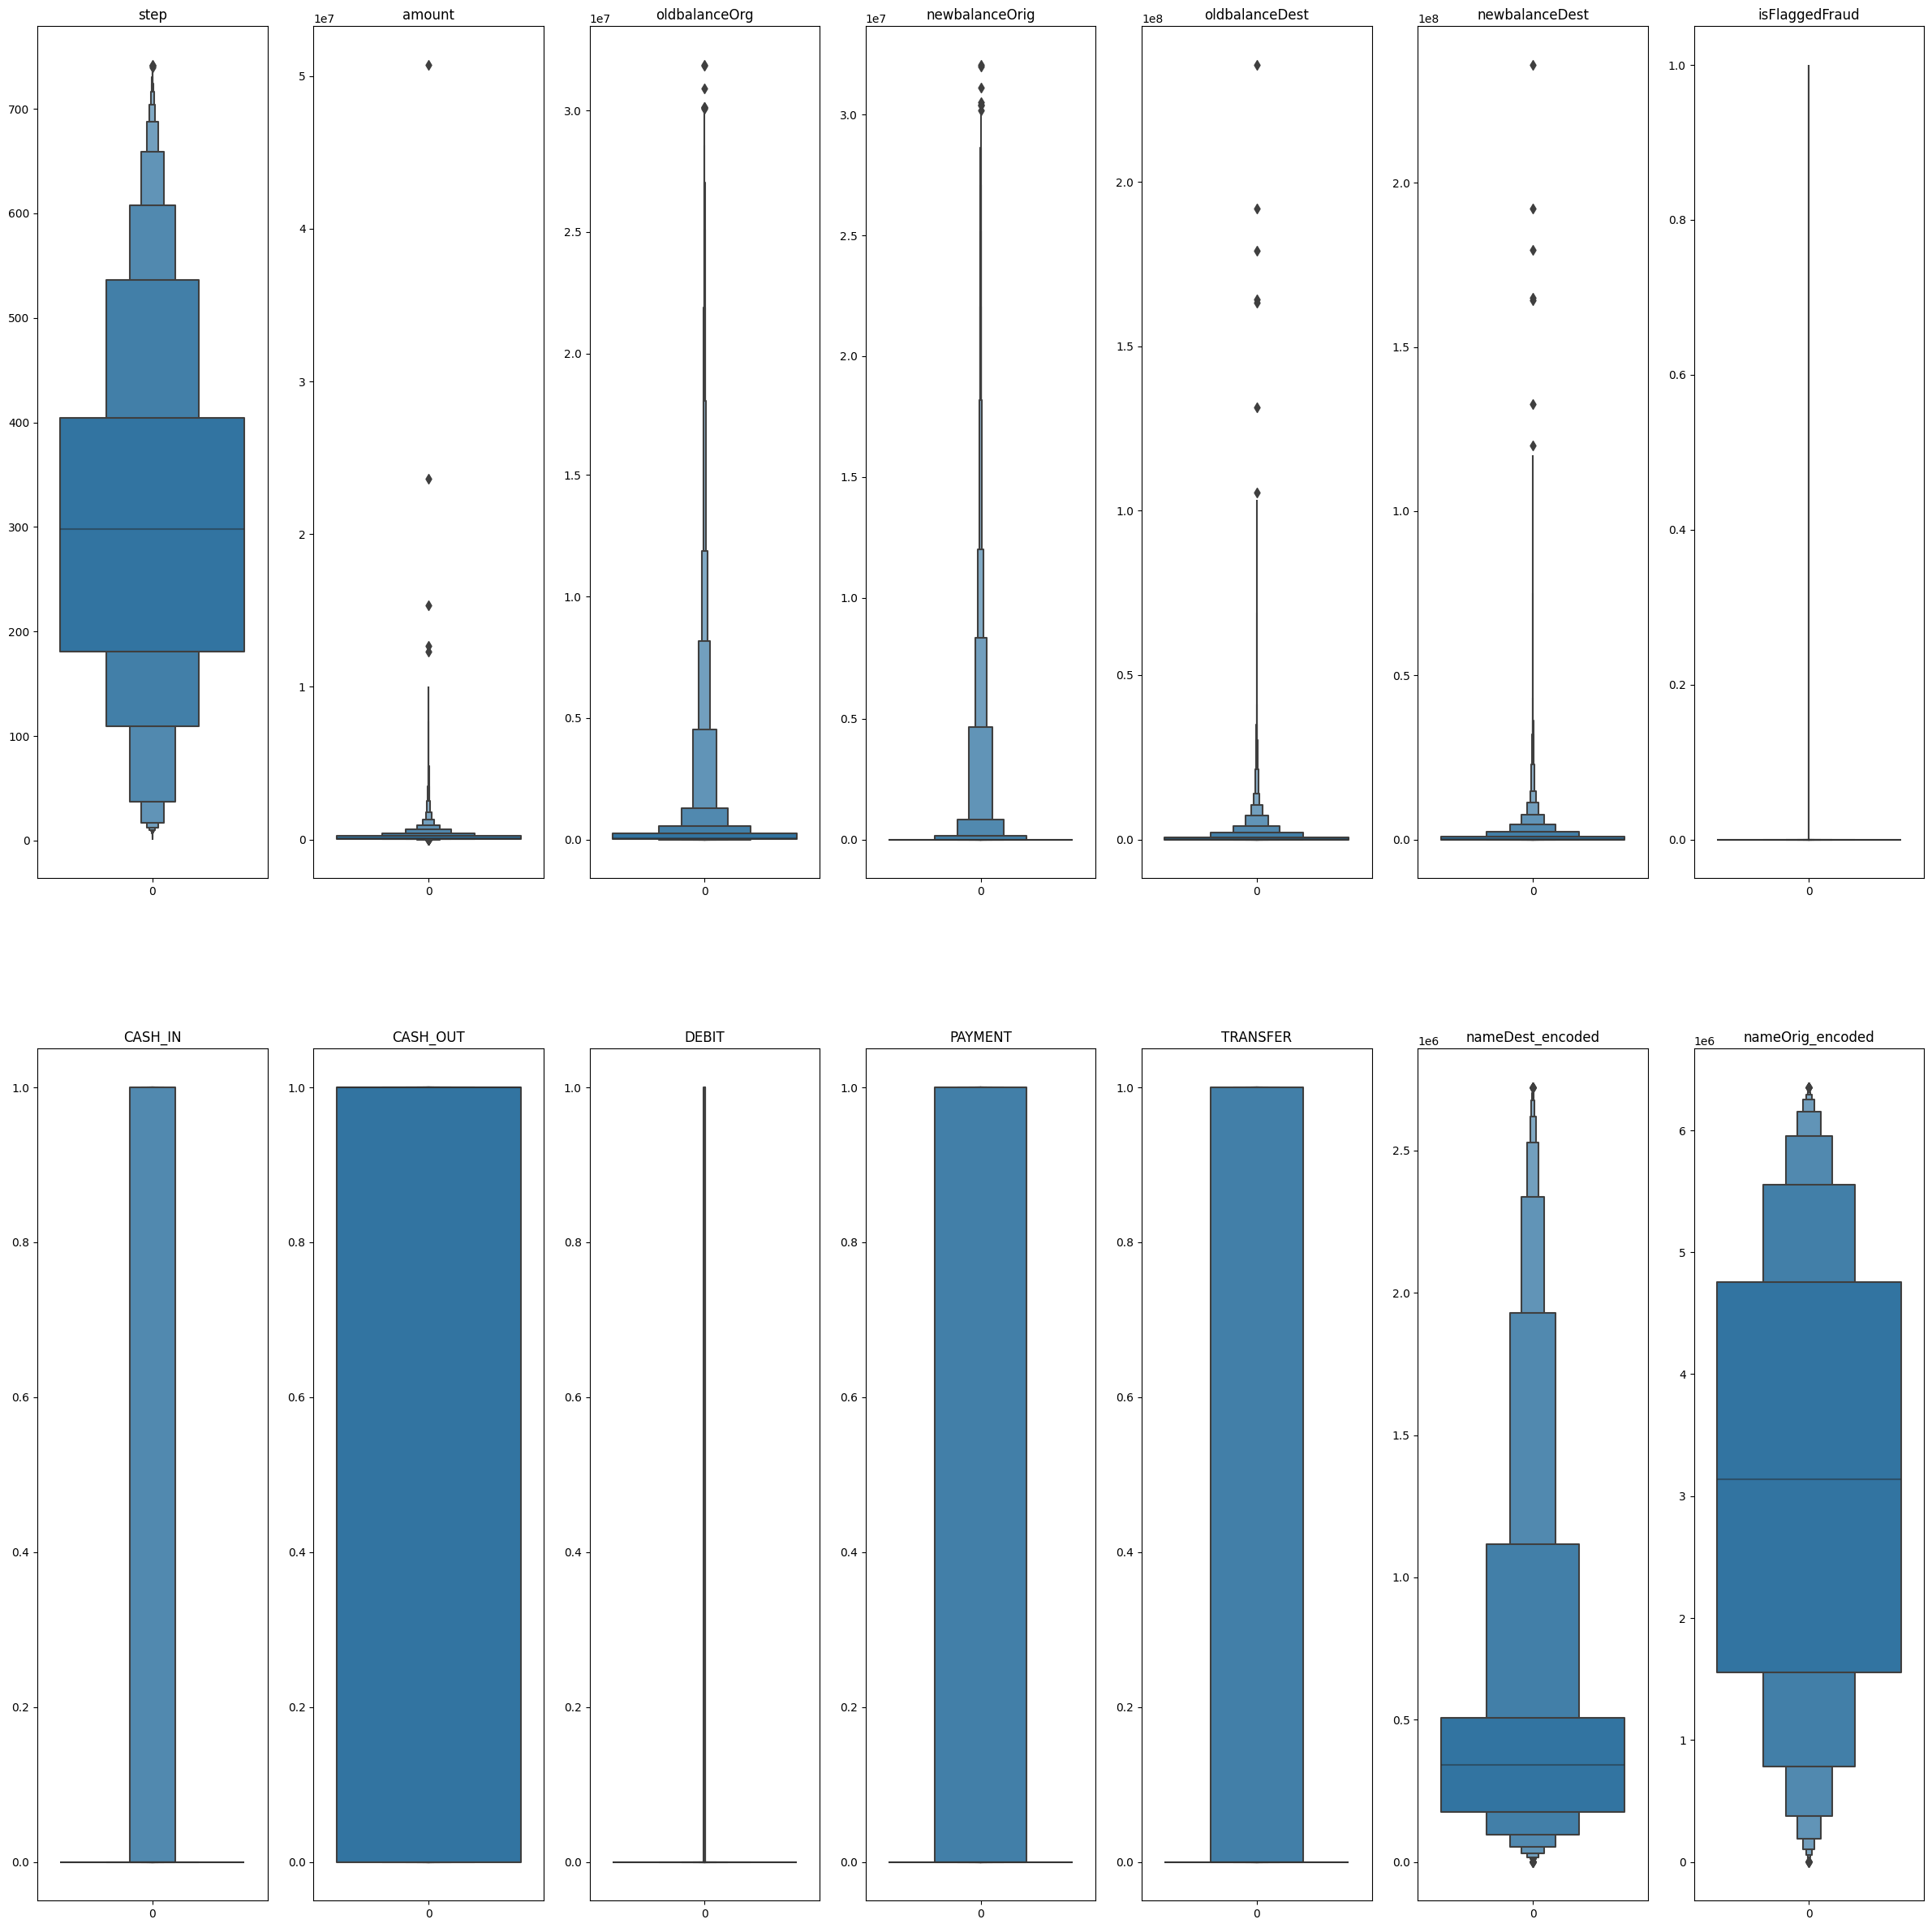

In [58]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

for ax, col in zip(axes, numerical_columns):
    print()
    sns.boxenplot(df_train[col], ax = ax)
    ax.set_title(col)

### 5. Next step is to see the density


In [59]:
range(len(df_train))


range(0, 50829)

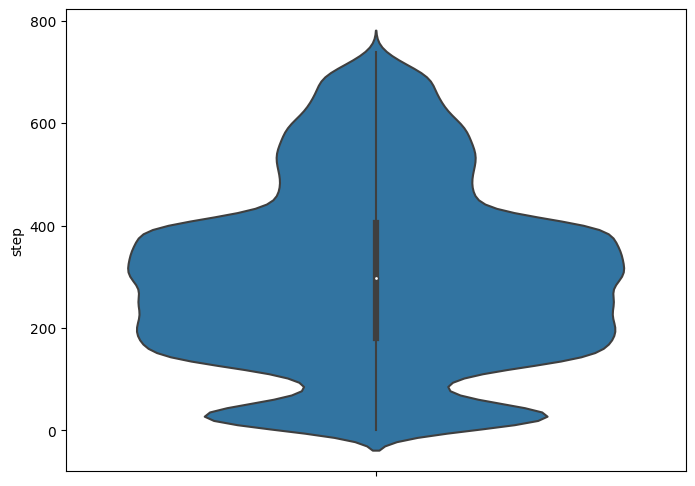

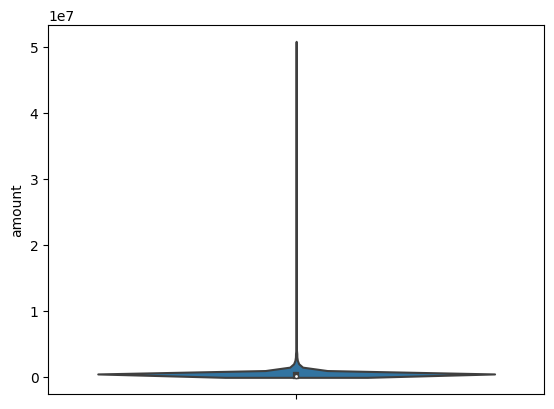

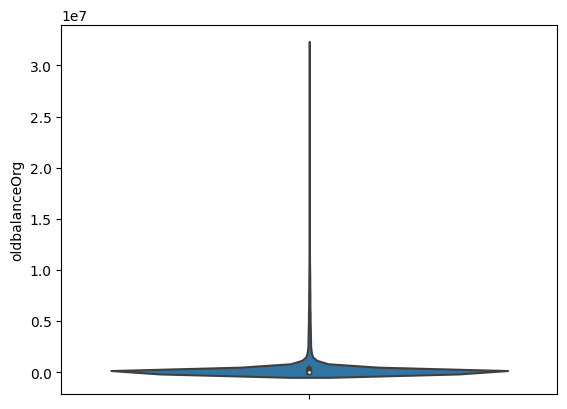

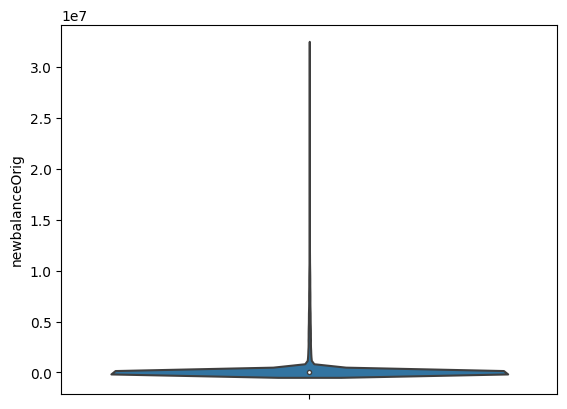

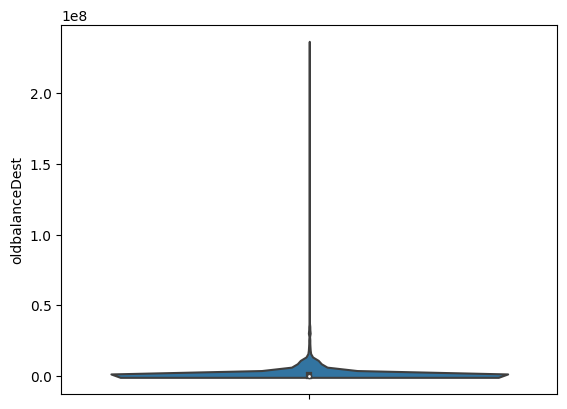

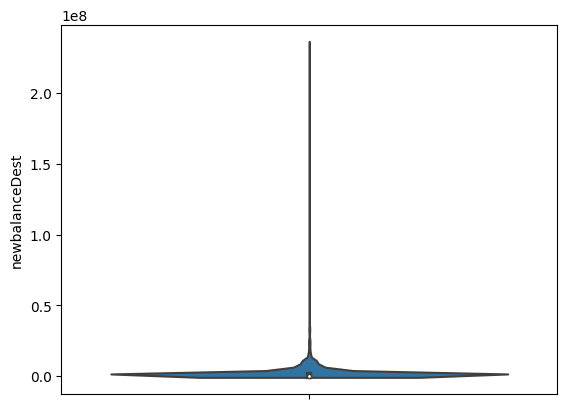

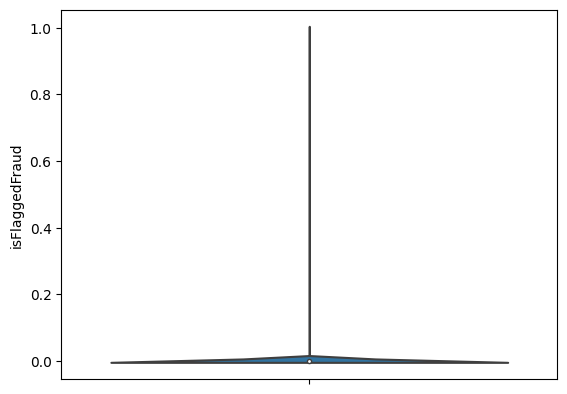

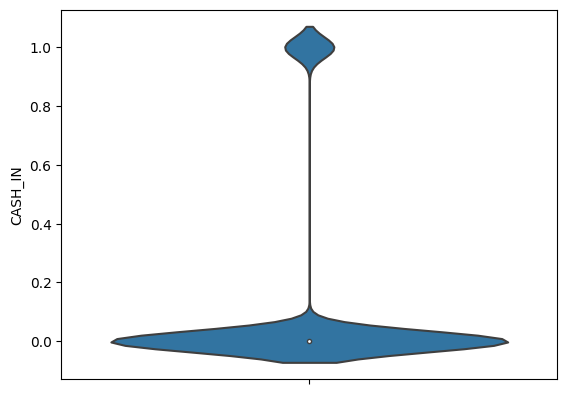

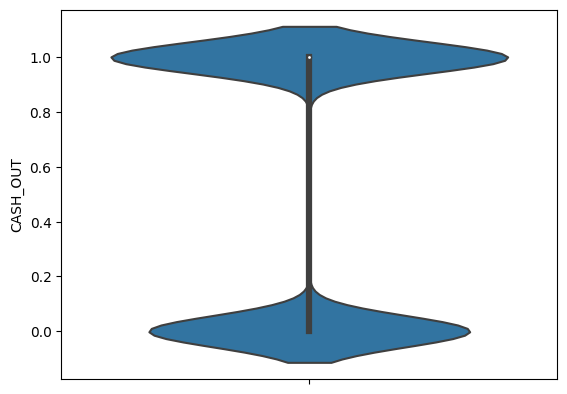

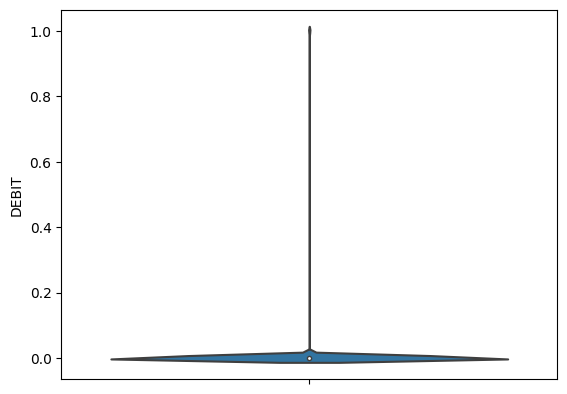

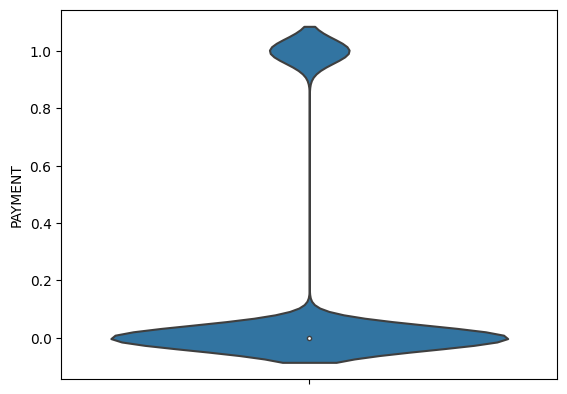

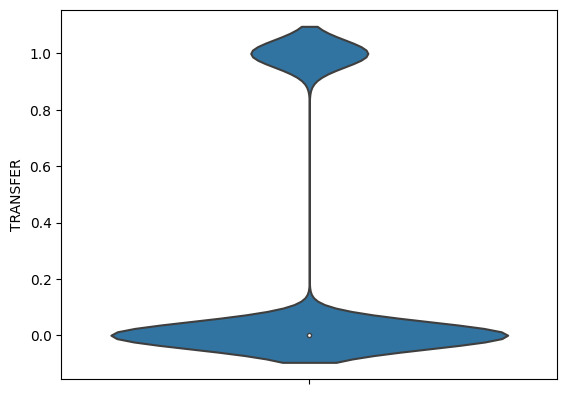

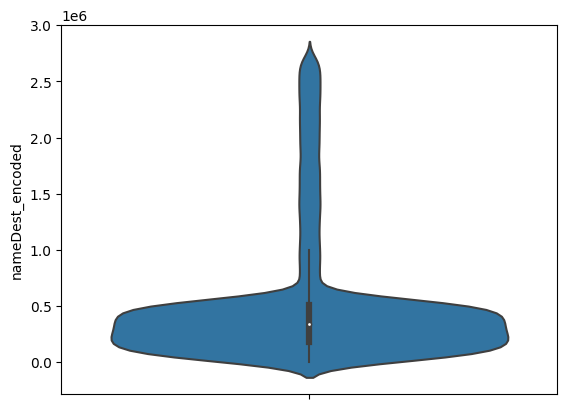

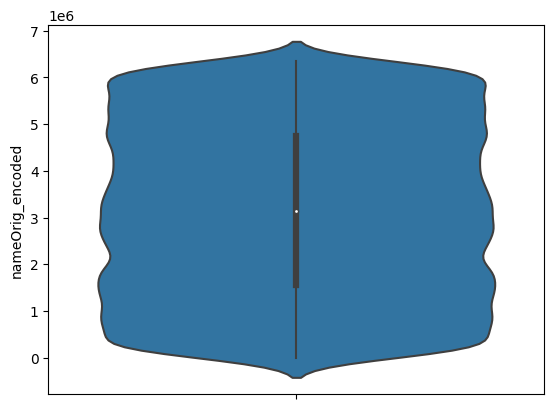

In [60]:
l=  []
for i in range(len(df_train)):
    l.append(i)
#   Plot a violin plot for numerical vs categorical
plt.figure(figsize=(8, 6))
for col in numerical_columns:
    sns.violinplot(y=df_train[col])
    plt.show()

### 6. Next step is to see the distribution plot


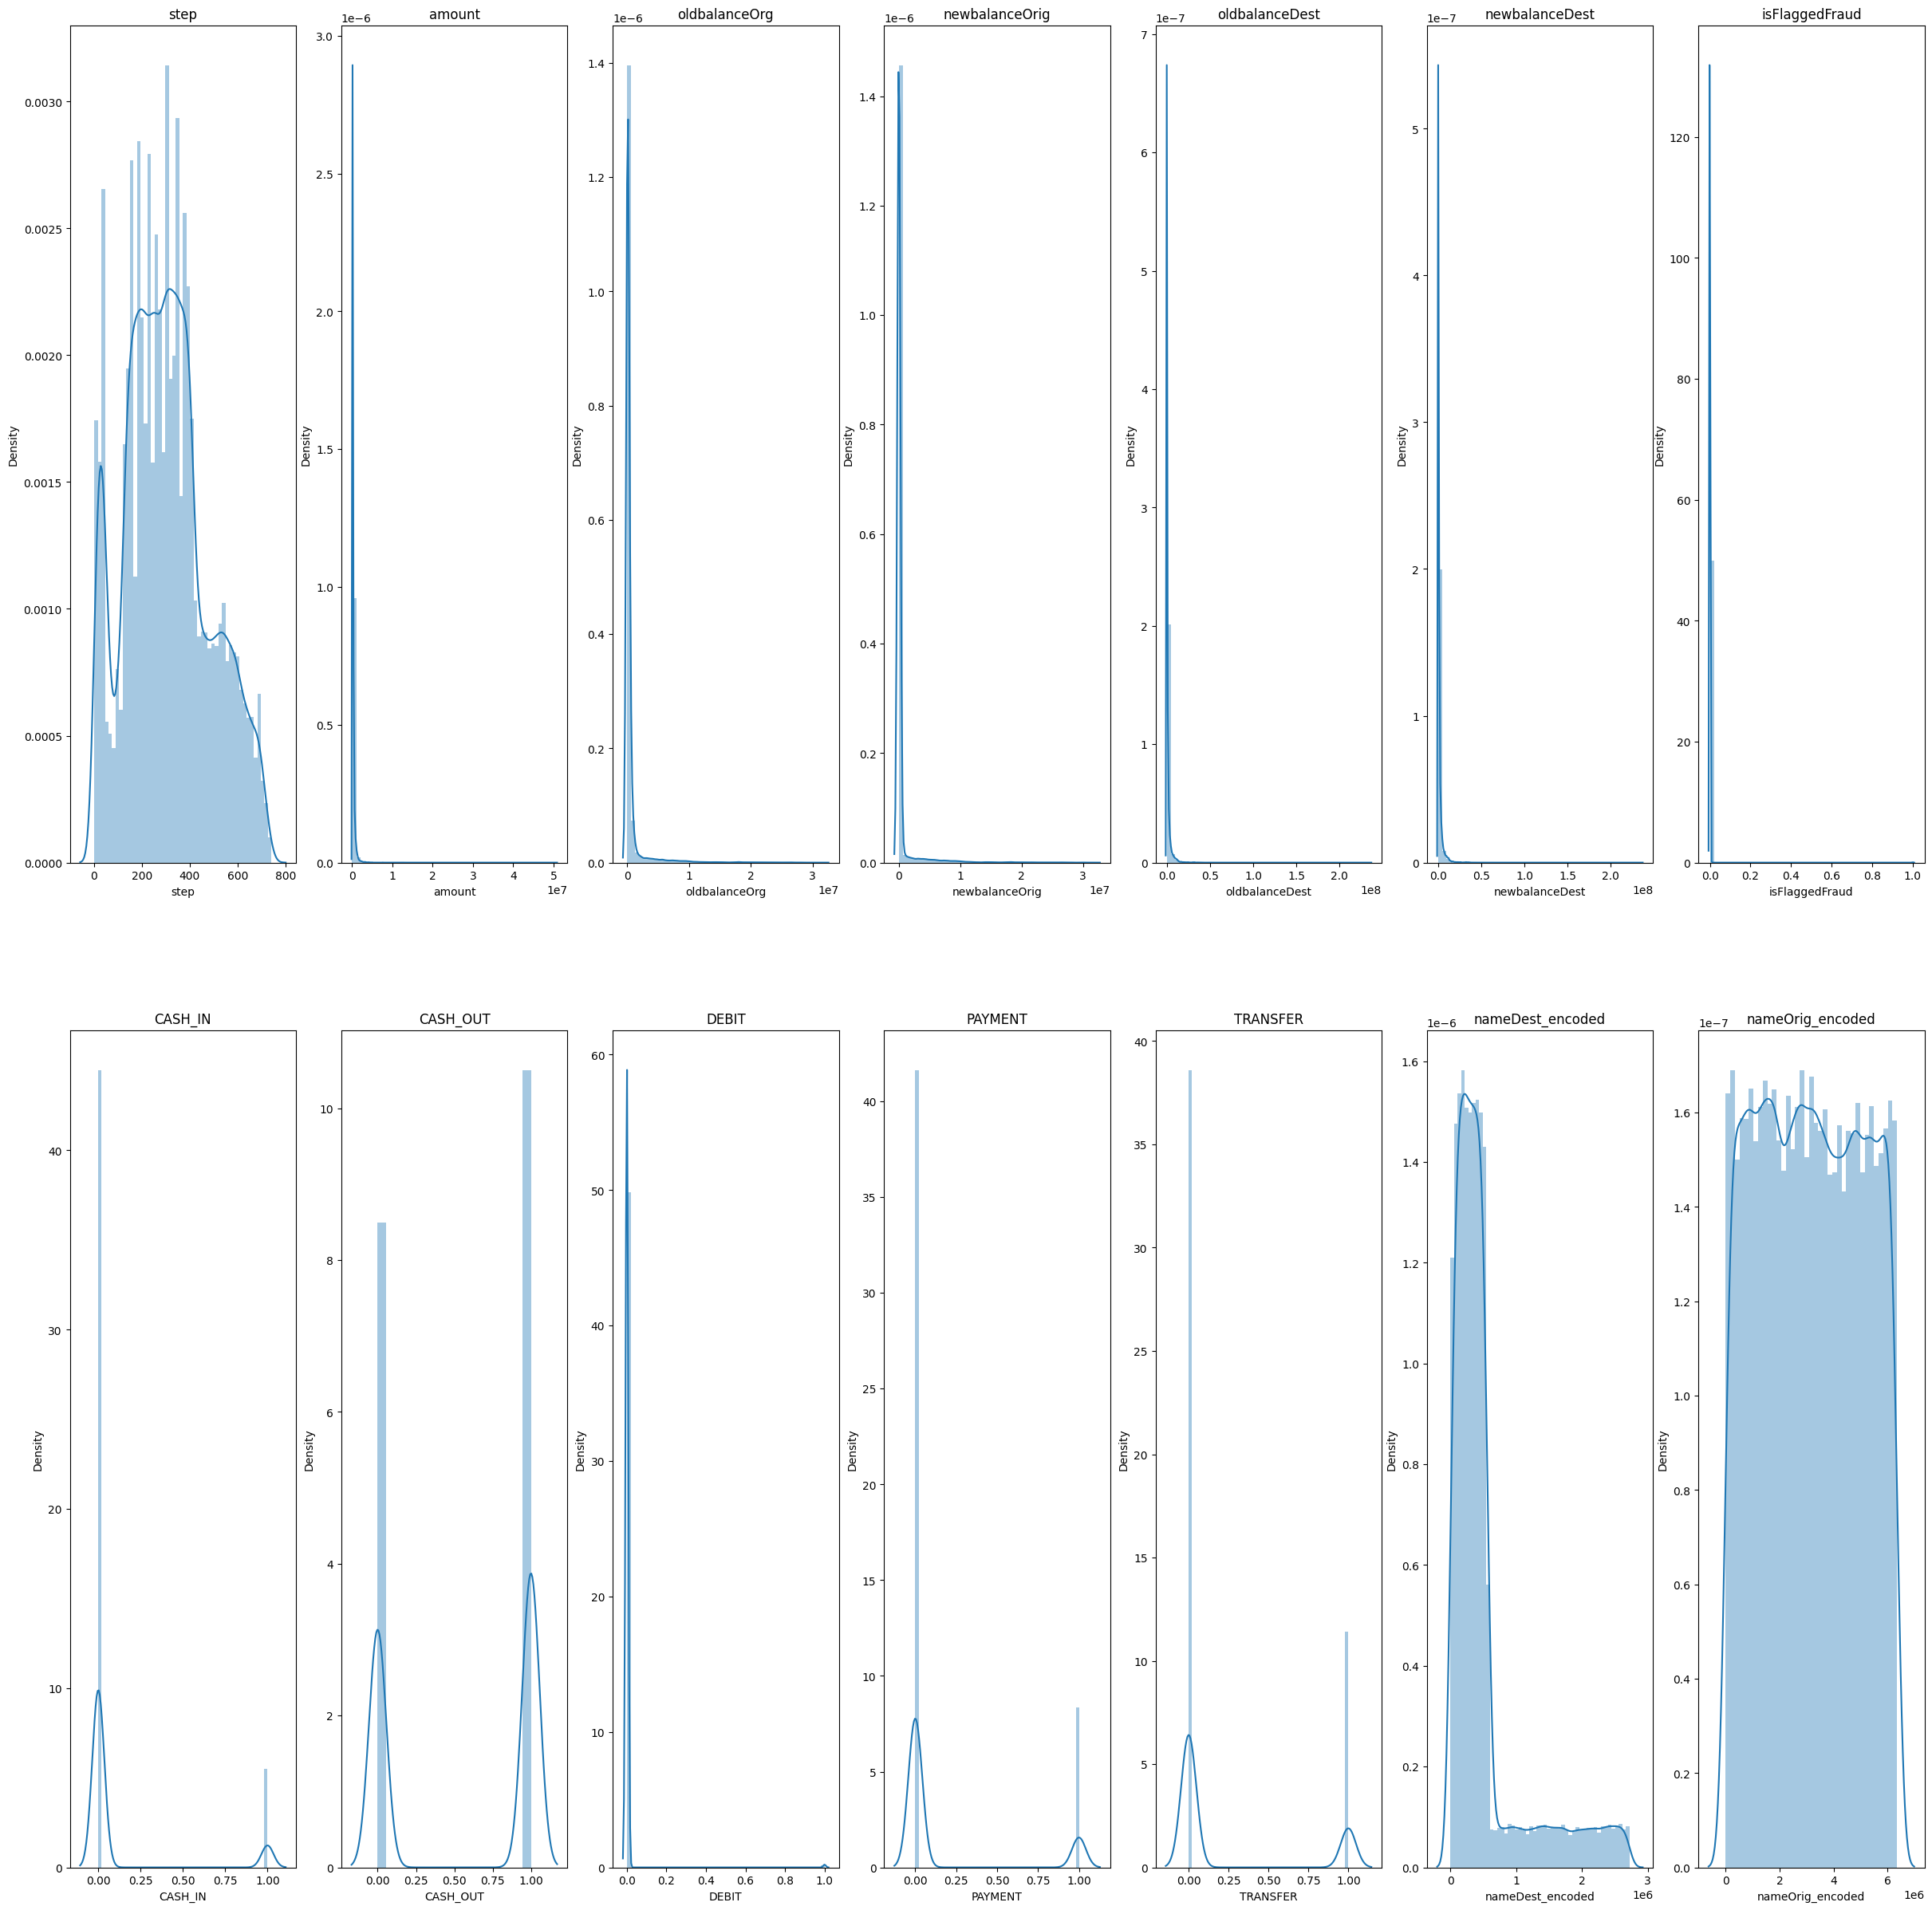

In [61]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

### 7. To get more clearity we also see the skewness in each of the numerical column


In [62]:
for col in numerical_columns:
    print(f" {df_train[col].skew() } in {col}")

 0.32907522436242387 in step
 32.68553090442 in amount
 7.542635502157765 in oldbalanceOrg
 7.525789126034026 in newbalanceOrig
 21.596917413135284 in oldbalanceDest
 19.9791308386168 in newbalanceDest
 50.38452366005486 in isFlaggedFraud
 2.4894972397745674 in CASH_IN
 -0.2130123782597912 in CASH_OUT
 16.954994847224686 in DEBIT
 1.7836909258082823 in PAYMENT
 1.2974895402177526 in TRANSFER
 2.181217674317024 in nameDest_encoded
 0.022616014163888646 in nameOrig_encoded


### 8. Next we see the count plot of each category i.e. basically the countplot


In [63]:
df.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN                bool
CASH_OUT               bool
DEBIT                  bool
PAYMENT                bool
TRANSFER               bool
nameDest_encoded      int64
nameOrig_encoded      int64
isFraud               int64
dtype: object

Text(0.5, 1.0, 'Count of categories in the label')

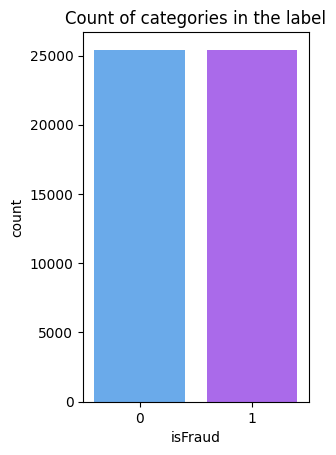

In [64]:
plt.subplot(1,2,1)
sns.countplot(x = 'isFraud' , palette= 'cool', data= output_col) 
plt.title("Count of categories in the label")

### 9. See the redundant values in a column


In [65]:
df_train[numerical_columns].describe(percentiles = [.25,.5,.75,.95,.97,.99])  


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04
mean,305.693384,2.129561e+05,5.368273e+05,4.270252e+05,1.019196e+06,1.191137e+06,0.000393,0.110213,0.552952,0.003443,0.167208,0.227882,5.139591e+05,3.150544e+06
std,173.018394,4.760683e+05,2.069521e+06,2.104247e+06,3.522850e+06,3.708267e+06,0.019833,0.313158,0.497193,0.058576,0.373165,0.419470,5.885310e+05,1.838557e+06
min,1.000000,9.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,2.600000e+01
25%,181.000000,2.783538e+04,1.048624e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769170e+05,1.555214e+06
50%,298.000000,1.057949e+05,6.282000e+04,0.000000e+00,3.767953e+04,2.428489e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.398270e+05,3.136695e+06
75%,404.000000,2.524101e+05,2.423399e+05,0.000000e+00,7.413421e+05,9.817932e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.056420e+05,4.752738e+06
95%,627.000000,7.440183e+05,2.080911e+06,2.005502e+06,4.880836e+06,5.332377e+06,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.093464e+06,6.044182e+06
97%,660.000000,9.647865e+05,4.753570e+06,4.889036e+06,7.325888e+06,7.746684e+06,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.354664e+06,6.161653e+06
99%,697.000000,1.575369e+06,1.025901e+07,1.044295e+07,1.235383e+07,1.294601e+07,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.597296e+06,6.281850e+06


## Modification on the basis of EDA


### 1. Appropriation 

### 2. NULL values



### 3. Removing the most correlated column


In [10]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
df_vif=calc_vif(X)
df_vif

,Variables,VIF
0,step,3.983052
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
6,isFlaggedFraud,1.076938
7,CASH_IN,2.283259
8,CASH_OUT,3.867847
9,DEBIT,1.016719


In [11]:
df_vif.dtypes

Variables     object
VIF          float64
dtype: object

In [12]:
df_vif[(df_vif['VIF'] < 0.25) | (df_vif['VIF'] > 4)]

,Variables,VIF
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
10,PAYMENT,6.566721
12,nameDest_encoded,6.879791


In [13]:
most_correlated_cols=list(df_vif[(df_vif['VIF'] < 0.25) | (df_vif['VIF'] > 4)]['Variables'].values)
most_correlated_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'PAYMENT',
 'nameDest_encoded']

In [14]:
new_cols=['oldbalanceDest','newbalanceDest','oldbalanceOrg','newbalanceOrig']

In [15]:
df_train.drop(new_cols,axis=1,inplace=True)
df_train

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,0,0,0,0,0,1,351115,1371643
4,379,678.130000,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,0,0,0,0,0,1,422565,1356128


### 4. Removing the Outliers

In [16]:
df_train.select_dtypes(include=np.number).columns


Index(['step', 'amount', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'nameDest_encoded', 'nameOrig_encoded'],
      dtype='object')

In [17]:
cols=df_train.select_dtypes(include=np.number).columns
for col in cols:
    print(f"Mode in {col} col is:")
    print(df_train[col].mode().values[0])
    print()

Mode in step col is:
307

Mode in amount col is:
10000000.0

Mode in isFlaggedFraud col is:
0

Mode in CASH_IN col is:
0

Mode in CASH_OUT col is:
1

Mode in DEBIT col is:
0

Mode in PAYMENT col is:
0

Mode in TRANSFER col is:
0

Mode in nameDest_encoded col is:
78924

Mode in nameOrig_encoded col is:
47675



In [18]:
cols=df_train.select_dtypes(include=np.number).columns
for col in cols:
    print(f"Median in {col} col is:")
    print(df_train[col].median())
    print()

Median in step col is:
298.0

Median in amount col is:
105794.85

Median in isFlaggedFraud col is:
0.0

Median in CASH_IN col is:
0.0

Median in CASH_OUT col is:
1.0

Median in DEBIT col is:
0.0

Median in PAYMENT col is:
0.0

Median in TRANSFER col is:
0.0

Median in nameDest_encoded col is:
339827.0

Median in nameOrig_encoded col is:
3136695.0



In [19]:
# Outlier imputing by median
cols=df_train.select_dtypes(include=np.number).columns


for col in cols:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("[",l,",",h,"]")
    value=df_train[col].median()
    df_train[col] = np.where((df_train[col] < l) | (df_train[col] > h), value, df_train[col])


[ -153.5 , 738.5 ]
[ -309026.734281777 , 589272.2368402507 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ -1.5 , 2.5 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ -316170.5 , 998729.5 ]
[ -3241072.0 , 9549024.0 ]


In [20]:
df_train  

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563.0,18417.240320,0.0,0.0,1.0,0.0,0.0,0.0,209519.0,2572822.0
1,419.0,346354.615847,0.0,0.0,1.0,0.0,0.0,0.0,403995.0,6311127.0
2,229.0,291590.310000,0.0,0.0,1.0,0.0,0.0,0.0,482160.0,3861560.0
3,418.0,66777.824054,0.0,0.0,0.0,0.0,0.0,0.0,351115.0,1371643.0
4,379.0,678.130000,0.0,0.0,0.0,0.0,0.0,0.0,339827.0,5689466.0
...,...,...,...,...,...,...,...,...,...,...
50824,244.0,105794.850000,0.0,0.0,1.0,0.0,0.0,0.0,370174.0,4423416.0
50825,378.0,302.460000,0.0,0.0,0.0,0.0,0.0,0.0,339827.0,1769882.0
50826,190.0,11327.270000,0.0,0.0,0.0,0.0,0.0,0.0,339827.0,6093817.0
50827,512.0,264334.474702,0.0,0.0,0.0,0.0,0.0,0.0,422565.0,1356128.0


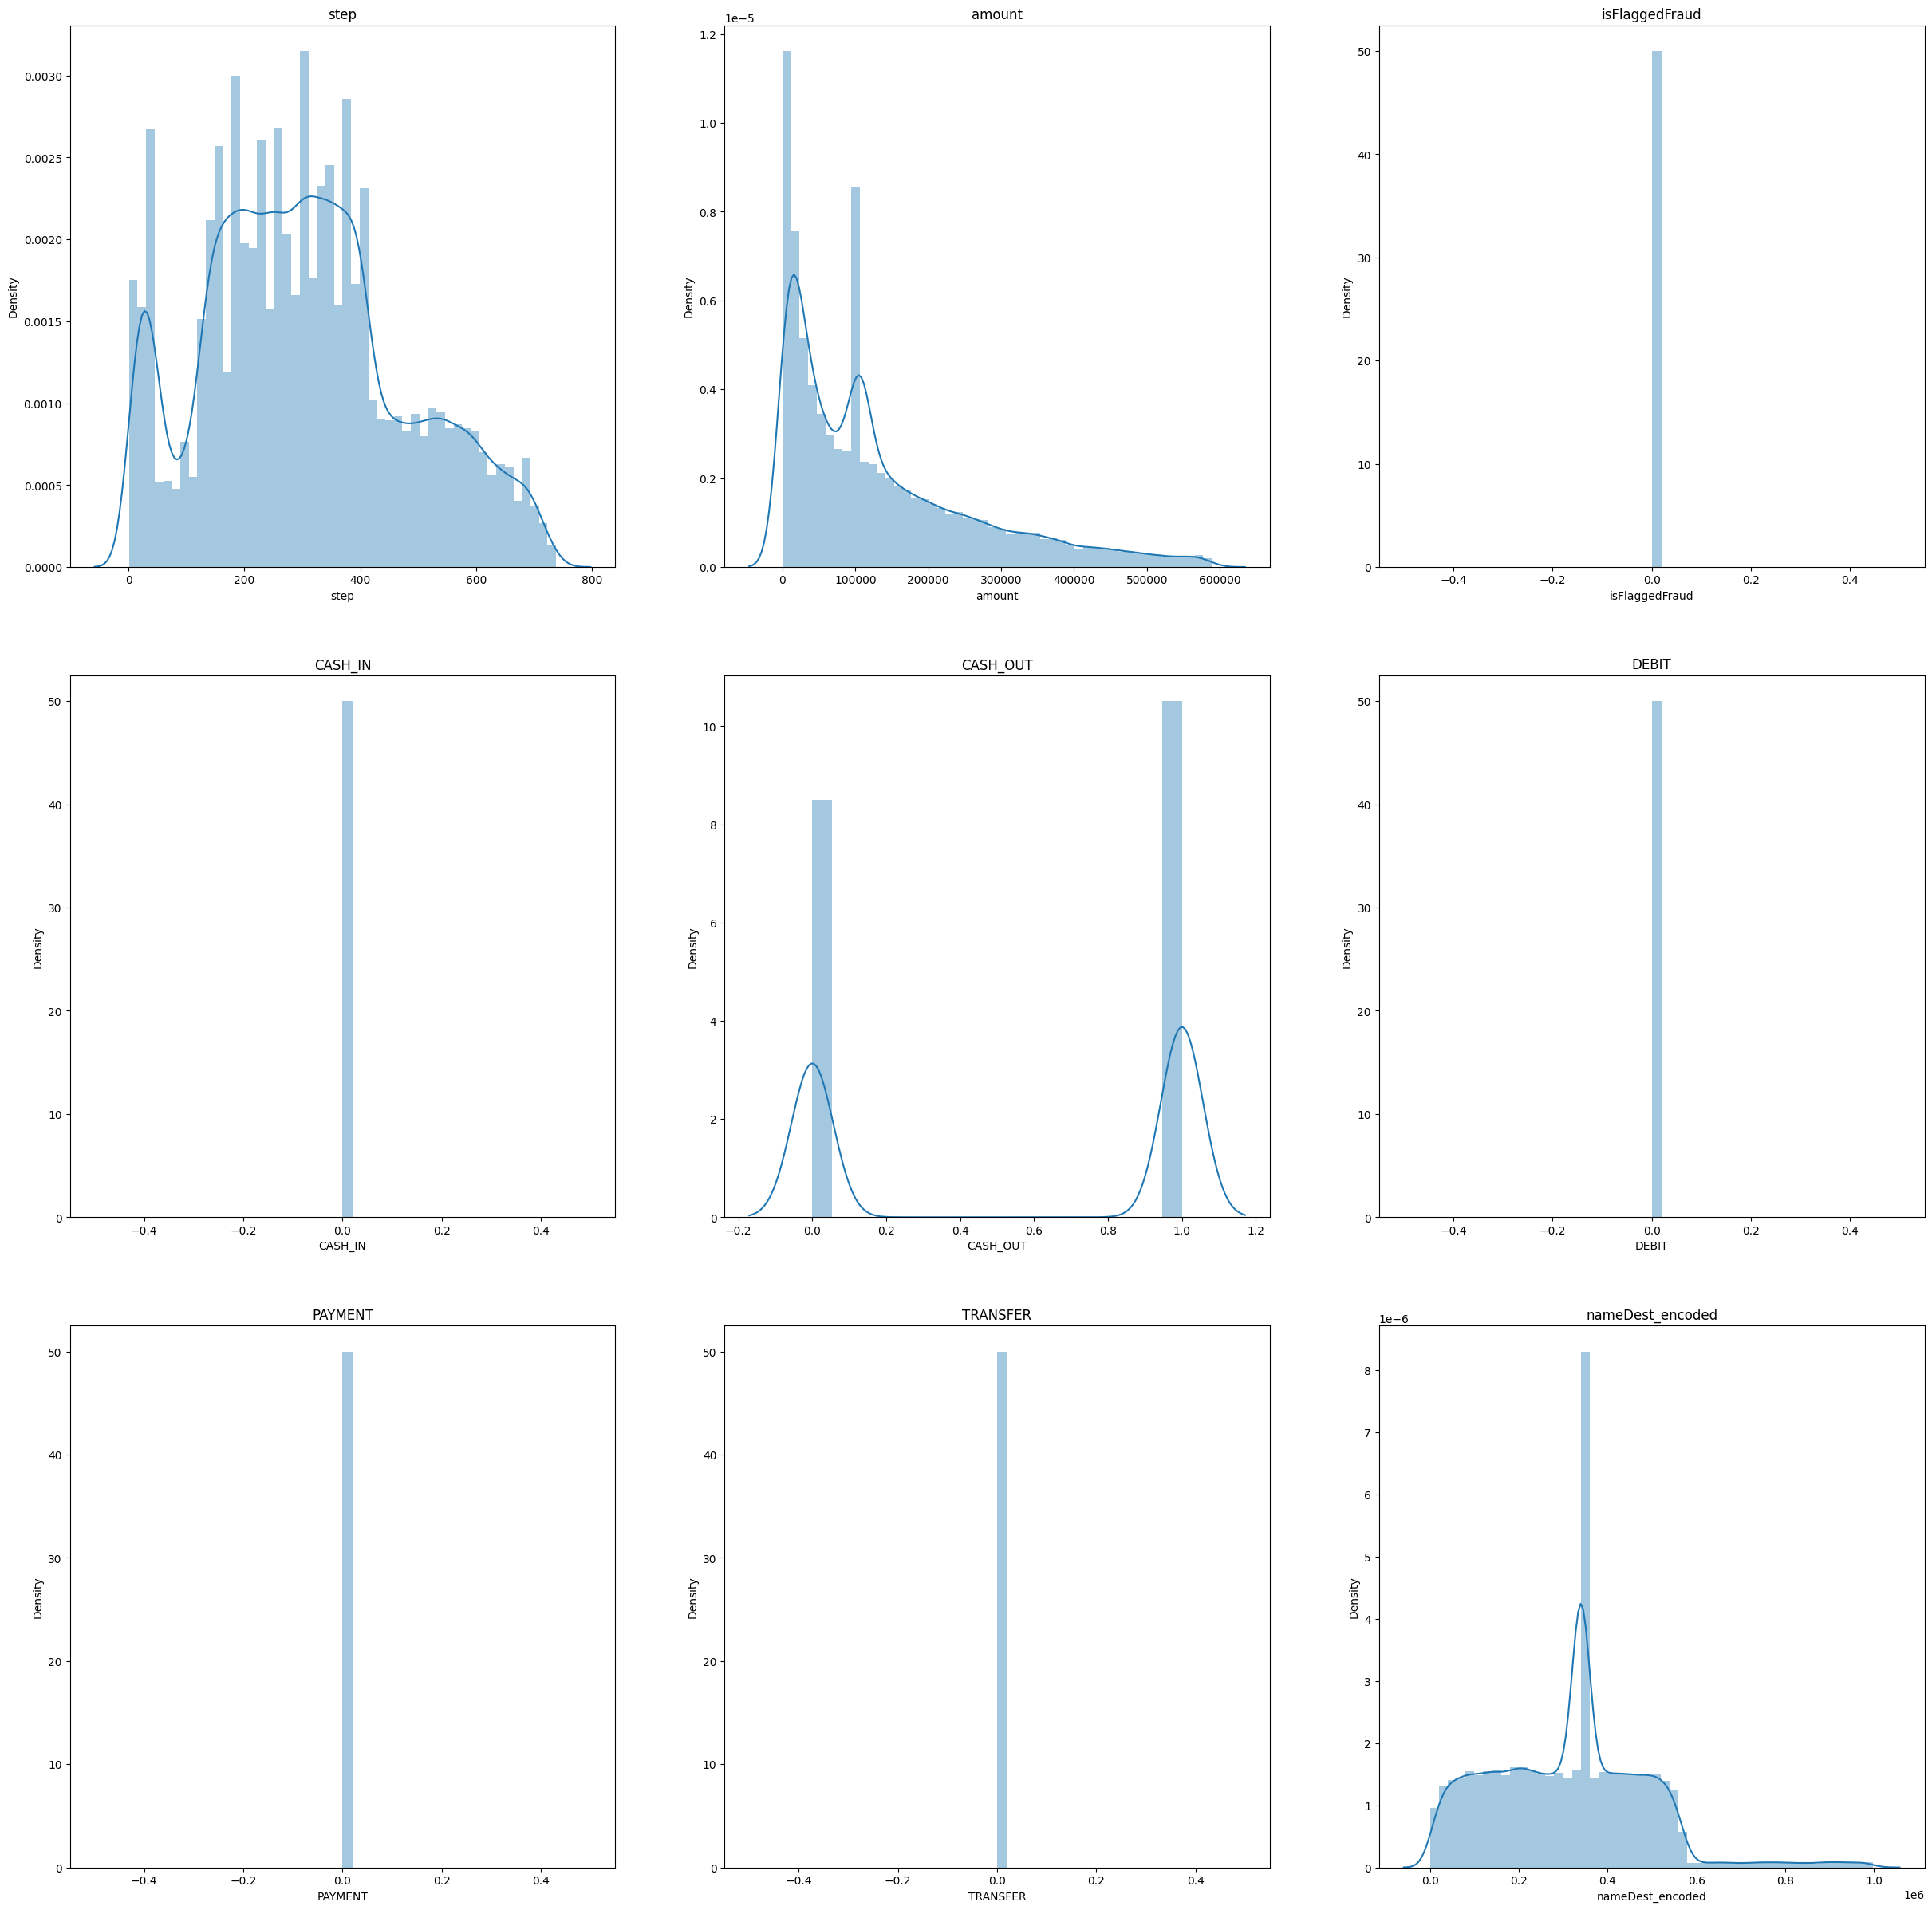

In [21]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)

cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)



### 5. Describe

In [22]:
df_train.describe(percentiles = [.25,.5,.75,.95,.97,.99])


,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,50829.000000,50829.0,50829.0,50829.000000,50829.0,50829.0,50829.0,50829.000000,5.082900e+04
mean,305.623817,134597.961990,0.0,0.0,0.552952,0.0,0.0,0.0,309384.096205,3.150544e+06
std,172.932591,132701.279531,0.0,0.0,0.497193,0.0,0.0,0.0,172606.843142,1.838557e+06
min,1.000000,0.970000,0.0,0.0,0.000000,0.0,0.0,0.0,9.000000,2.600000e+01
25%,181.000000,27835.379889,0.0,0.0,0.000000,0.0,0.0,0.0,176917.000000,1.555214e+06
50%,298.000000,105794.850000,0.0,0.0,1.000000,0.0,0.0,0.0,339827.000000,3.136695e+06
75%,404.000000,196734.770000,0.0,0.0,1.000000,0.0,0.0,0.0,416360.000000,4.752738e+06
95%,627.000000,423938.162189,0.0,0.0,1.000000,0.0,0.0,0.0,553830.400000,6.044182e+06
97%,660.000000,474093.759304,0.0,0.0,1.000000,0.0,0.0,0.0,613378.840000,6.161653e+06
99%,696.000000,546450.571058,0.0,0.0,1.000000,0.0,0.0,0.0,880289.200000,6.281850e+06


In [23]:
df_train.columns

Index(['step', 'amount', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'nameDest_encoded', 'nameOrig_encoded'],
      dtype='object')

In [24]:
for col in df_train.columns:
    print(f" {df_train[col].skew() } in {col}")

 0.32827887235807535 in step
 1.281478698048828 in amount
 0.0 in isFlaggedFraud
 0.0 in CASH_IN
 -0.2130123782597912 in CASH_OUT
 0.0 in DEBIT
 0.0 in PAYMENT
 0.0 in TRANSFER
 0.5630582153093218 in nameDest_encoded
 0.022616014163888646 in nameOrig_encoded


### 6. Scaling

In [25]:
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns)
df_train

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,0.762551,0.031268,0.0,0.0,1.0,0.0,0.0,0.0,0.209806,0.405012
1,0.567164,0.588057,0.0,0.0,1.0,0.0,0.0,0.0,0.404557,0.993501
2,0.309362,0.495076,0.0,0.0,1.0,0.0,0.0,0.0,0.482833,0.607887
3,0.565807,0.113377,0.0,0.0,0.0,0.0,0.0,0.0,0.351602,0.215921
4,0.512890,0.001150,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.895638
...,...,...,...,...,...,...,...,...,...,...
50824,0.329715,0.179622,0.0,0.0,1.0,0.0,0.0,0.0,0.370688,0.696335
50825,0.511533,0.000512,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.278613
50826,0.256445,0.019230,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.959291
50827,0.693351,0.448799,0.0,0.0,0.0,0.0,0.0,0.0,0.423153,0.213479


In [26]:
df_train

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,0.762551,0.031268,0.0,0.0,1.0,0.0,0.0,0.0,0.209806,0.405012
1,0.567164,0.588057,0.0,0.0,1.0,0.0,0.0,0.0,0.404557,0.993501
2,0.309362,0.495076,0.0,0.0,1.0,0.0,0.0,0.0,0.482833,0.607887
3,0.565807,0.113377,0.0,0.0,0.0,0.0,0.0,0.0,0.351602,0.215921
4,0.512890,0.001150,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.895638
...,...,...,...,...,...,...,...,...,...,...
50824,0.329715,0.179622,0.0,0.0,1.0,0.0,0.0,0.0,0.370688,0.696335
50825,0.511533,0.000512,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.278613
50826,0.256445,0.019230,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.959291
50827,0.693351,0.448799,0.0,0.0,0.0,0.0,0.0,0.0,0.423153,0.213479


## Feature selection

## Encoding

## Making Model


In [27]:
# # import mlflow
# experiment_id = mlflow.create_experiment(
#         name="PATH5",
#         tags={"env": "dev", "version": "1.0.0"},
#     )


In [28]:
# experiment = mlflow.get_experiment_by_name('PATH5')
# experiment_id = experiment.experiment_id
# mlflow.delete_experiment(experiment_id)

In [41]:
X=df_train
Y=output_col

In [42]:
    
# avg_accuracies=defaultdict(list)
highest_accuracies=defaultdict(list)

algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()","KNeighborsClassifier()","RandomForestClassifier()","SGDClassifier()","RidgeClassifierCV()","GaussianNB()"]
for al in algorithms_to_be_tested:
    # avg_accuracies[al].append(0)# Accuracy
    # avg_accuracies[al].append(0)# Precisoion
    # avg_accuracies[al].append(0)# Recall
    # avg_accuracies[al].append(0)#fbeta
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))

In [43]:
highest_accuracies

defaultdict(list,
            {'LogisticRegression()': [-inf, -inf, -inf, -inf],
             'DecisionTreeClassifier()': [-inf, -inf, -inf, -inf],
             'KNeighborsClassifier()': [-inf, -inf, -inf, -inf],
             'RandomForestClassifier()': [-inf, -inf, -inf, -inf],
             'SGDClassifier()': [-inf, -inf, -inf, -inf],
             'RidgeClassifierCV()': [-inf, -inf, -inf, -inf],
             'GaussianNB()': [-inf, -inf, -inf, -inf]})

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
    

In [45]:
# metrics_history = defaultdict(lambda: defaultdict(list))


In [46]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle):
    
    model=eval(algo)
    
    evaluation_metric=eval(evaluation_metric)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
    efs1 = EFS(model, 
           min_features=7,
           max_features=8,
           scoring='accuracy',
           print_progress=True,
           cv=5)
    efs1.fit(X_train, Y_train)
    # print('Best accuracy score: %.2f' % efs1.best_score_)
    print(f"For algo {algo}")
    print('Best subset (indices):', efs1.best_idx_)
    print('Best subset (corresponding names):', list(efs1.best_feature_names_))
    best_params=list(efs1.best_feature_names_)
    X_train=X_train.loc[:,best_params]
    X_test=X_test.loc[:,best_params]
    
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    
    accuracy=evaluation_metric(y_true=Y_test, y_pred=predicted)
    precision,recall,fbeta_score,support=precision_recall_fscore_support(y_true=Y_test,y_pred=predicted,labels=[0,1])
    # metrics_history[algo]['accuracy'].append(accuracy)
    # metrics_history[algo]['precision'].append(precision[1])
    # metrics_history[algo]['recall'].append(recall[1])
    # metrics_history[algo]['fbeta'].append(fbeta_score[1])
    
    print(f"Finally best train accuracy for {algo} is : ",model.score(X_train,Y_train))
    print(f"Finally best test accuracy for {algo} is : ",accuracy)
    
    cl=classification_report(y_true=Y_test,y_pred=predicted)
    print(cl)
    
        
        
    print()  
    # print(f"{algo[:-2]}_train_accuracy_iteration_{iteration_number}", model.score(X_train, Y_train))
    mlflow.log_metric(f"{algo[:-2]}_test_accuracy", accuracy)
    mlflow.log_metric(f"{algo[:-2]}_train_accuracy",  model.score(X_train,Y_train))
    mlflow.log_metric(f"{algo[:-2]}_precision", precision[1])
    mlflow.log_metric(f"{algo[:-2]}_recall", recall[1])
    mlflow.log_metric(f"{algo[:-2]}_fbeta_score", fbeta_score[1])
    # mlflow.log_metric(f"{algo[:-2]}_best_subset_features", list(efs1.best_feature_names_))

    
    
#     print(f"Training accuracy of {model} at iteration number {iteration_number} is ", model.score(X_train,Y_train))
#     print(f"Testing accuracy of {model} at iteration number {iteration_number} is ",accuracy)
    
#     if accuracy>highest_accuracies[algo][0]:
        
    highest_accuracies[algo][0]=accuracy
    highest_accuracies[algo][1]=precision[1]
    highest_accuracies[algo][2]=recall[1]
    highest_accuracies[algo][2]=fbeta_score[1]

#         print(f"New_highest is reached at iteration number {iteration_number} ",'\n',accuracy,precision,recall)
#     avg_accuracies[algo][0]+=accuracy
#     avg_accuracies[algo][1]+=precision[1]
#     avg_accuracies[algo][2]+=recall[1]
#     avg_accuracies[algo][2]+=fbeta_score[1]
#     print()
#     print("--------------------------------------------------------")
#     print(f"At Iteration {iteration_number}")
#     print(avg_accuracies)
    cm = confusion_matrix(y_true=Y_test, y_pred=predicted, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure object
    disp.plot(ax=ax)  # Plot the confusion matrix on the figure
    plt.show()
    mlflow.log_figure(fig, f"metrics/{algo}_confusion_matrix.png")
    

    


In [47]:
# for algo in ['LogisticRegression()']:
#     algo_testing(algo=algo,test_size=0.2,X=X,Y=Y,evaluation_metric='accuracy_score',random_state=42,shuffle=True,iteration_number=1)

Features: 165/165

For algo LogisticRegression()
Best subset (indices): (0, 2, 3, 4, 5, 8, 9)
Best subset (corresponding names): ['step', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'nameDest_encoded', 'nameOrig_encoded']
Finally best train accuracy for LogisticRegression() is :  0.7141873447605932
Finally best test accuracy for LogisticRegression() is :  0.7140468227424749
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166




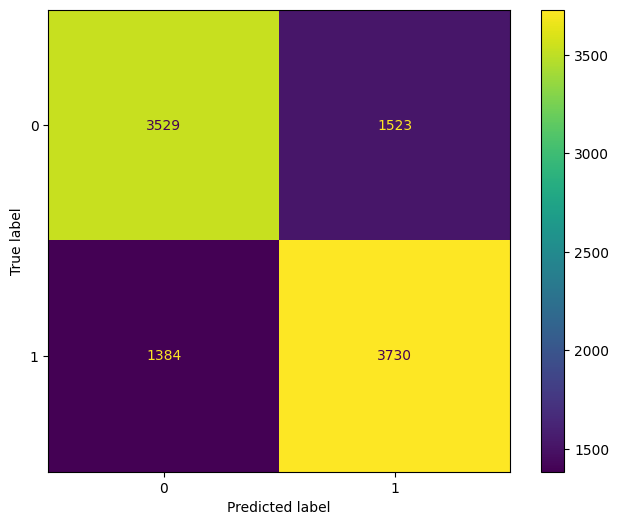

Features: 165/165

For algo DecisionTreeClassifier()
Best subset (indices): (0, 2, 3, 4, 5, 6, 7)
Best subset (corresponding names): ['step', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
Finally best train accuracy for DecisionTreeClassifier() is :  0.8357720778102944
Finally best test accuracy for DecisionTreeClassifier() is :  0.8220539051741098
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      5052
           1       0.90      0.73      0.80      5114

    accuracy                           0.82     10166
   macro avg       0.83      0.82      0.82     10166
weighted avg       0.83      0.82      0.82     10166




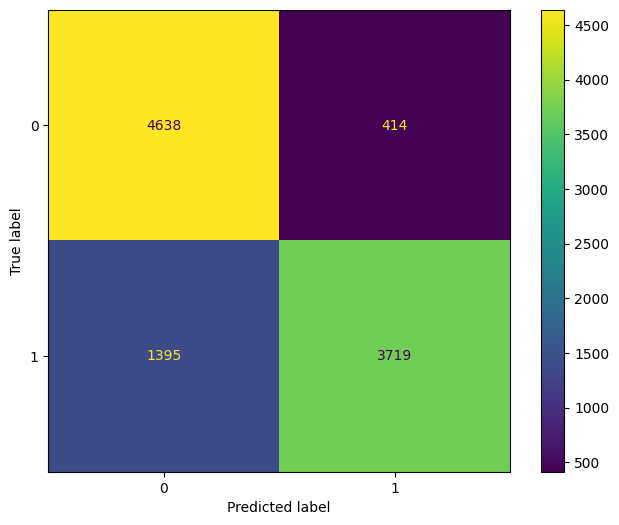

Features: 165/165

For algo KNeighborsClassifier()
Best subset (indices): (0, 2, 3, 4, 5, 6, 7)
Best subset (corresponding names): ['step', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
Finally best train accuracy for KNeighborsClassifier() is :  0.8128027936945135
Finally best test accuracy for KNeighborsClassifier() is :  0.8017902813299232
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      5052
           1       0.82      0.77      0.80      5114

    accuracy                           0.80     10166
   macro avg       0.80      0.80      0.80     10166
weighted avg       0.80      0.80      0.80     10166




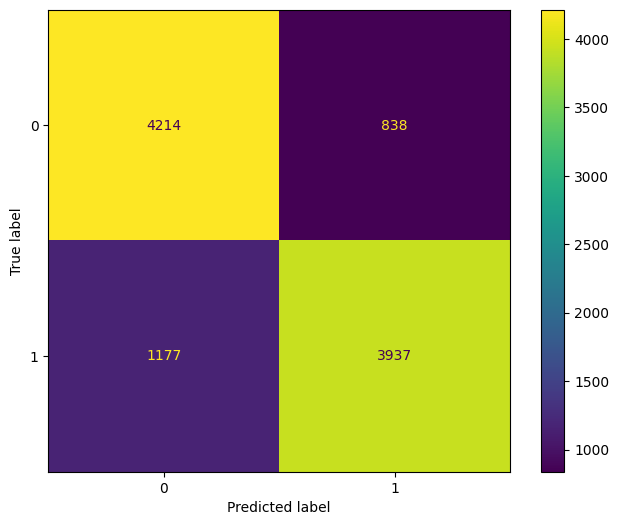

Features: 165/165

For algo RandomForestClassifier()
Best subset (indices): (0, 1, 2, 3, 4, 6, 8, 9)
Best subset (corresponding names): ['step', 'amount', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'PAYMENT', 'nameDest_encoded', 'nameOrig_encoded']
Finally best train accuracy for RandomForestClassifier() is :  0.9999754076187197
Finally best test accuracy for RandomForestClassifier() is :  0.8534330120007869
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5052
           1       0.85      0.87      0.86      5114

    accuracy                           0.85     10166
   macro avg       0.85      0.85      0.85     10166
weighted avg       0.85      0.85      0.85     10166




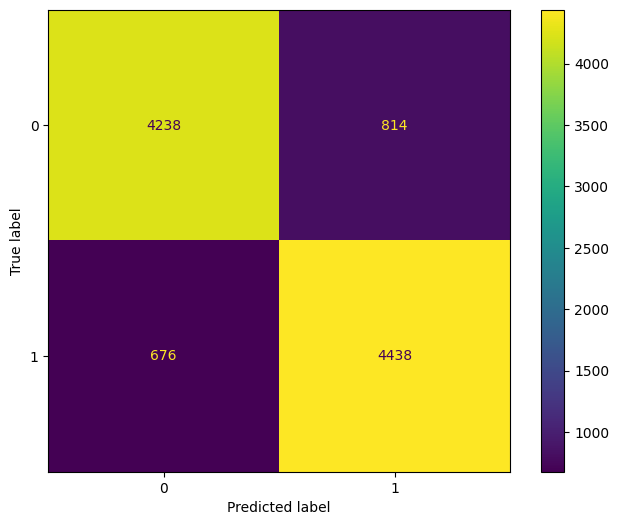

Features: 165/165

For algo SGDClassifier()
Best subset (indices): (0, 1, 2, 3, 4, 5, 6)
Best subset (corresponding names): ['step', 'amount', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT']
Finally best train accuracy for SGDClassifier() is :  0.6986695521727369
Finally best test accuracy for SGDClassifier() is :  0.6982097186700768
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166




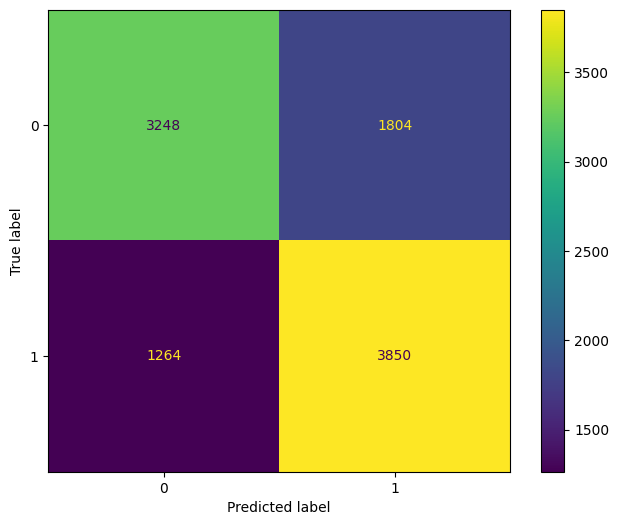

Features: 165/165

For algo RidgeClassifierCV()
Best subset (indices): (0, 2, 3, 4, 5, 8, 9)
Best subset (corresponding names): ['step', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'nameDest_encoded', 'nameOrig_encoded']
Finally best train accuracy for RidgeClassifierCV() is :  0.7153923714433269
Finally best test accuracy for RidgeClassifierCV() is :  0.7142435569545544
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166




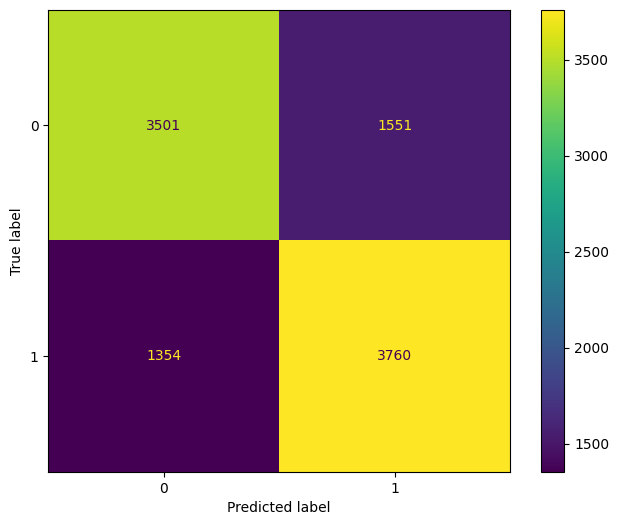

Features: 165/165

For algo GaussianNB()
Best subset (indices): (0, 2, 3, 4, 5, 6, 7)
Best subset (corresponding names): ['step', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
Finally best train accuracy for GaussianNB() is :  0.722278238201805
Finally best test accuracy for GaussianNB() is :  0.7246704701947668
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      5052
           1       0.71      0.78      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.73      0.72      0.72     10166
weighted avg       0.73      0.72      0.72     10166




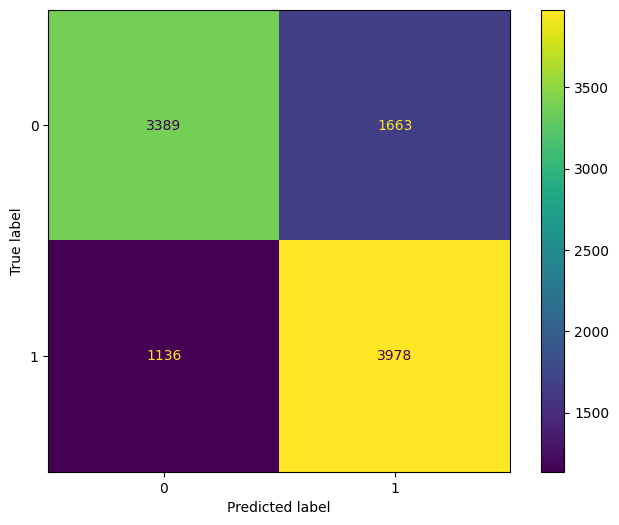

In [48]:
# n_iter=10
# Perform algorithm testing and log metrics

with mlflow.start_run(run_name="logging_metrics_final", experiment_id=mlflow.get_experiment_by_name("PATH5").experiment_id) as run:
    for algo in algorithms_to_be_tested:
        
        algo_testing(algo=algo, test_size=0.2, X=X, Y=Y, evaluation_metric="accuracy_score", random_state=42, shuffle=True)
            # metrics_history[algo]['accuracy'].append(avg_accuracies[algo][0])
            # metrics_history[algo]['precision'].append(avg_accuracies[algo][1])
            # metrics_history[algo]['recall'].append(avg_accuracies[algo][2])
            # metrics_history[algo]['fbeta'].append(avg_accuracies[algo][3])
        
        # Calculate average metrics
        # avg_accuracies[algo][0]/=n_iter
        # avg_accuracies[algo][1]/=n_iter
        # avg_accuracies[algo][2]/=n_iter
        # avg_accuracies[algo][3]/=n_iter


#     def plot_metrics(metrics_history, metric_name):
#         fig_roc=plt.figure(figsize=(10, 6))
#         for algo in algorithms_to_be_tested:
#             plt.plot(metrics_history[algo][metric_name], label=algo)
#         plt.xlabel('Iterations')
#         plt.ylabel(metric_name.capitalize())
#         plt.title(f'{metric_name.capitalize()} over Iterations')
#         plt.legend()
#         plt.grid(True)
#         plt.savefig(f"{metric_name}_plot.png")
#         plt.show()
#         mlflow.log_figure(fig_roc, f"metrics/{metric_name}.png")
        
#         # mlflow.log_artifact(f"{metric_name}_plot.png")
    
#     # Generate and log plots for each metric
#     for metric in ['accuracy', 'precision', 'recall', 'fbeta']:
#         plot_metrics(metrics_history, metric)
mlflow.end_run()